In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.patches as mpatches

In [2]:
path = "/Users/mj/Desktop/INFORMS_CODE_FILE/network design code/Files_to_solve" ## Please set up a directory for the code file.

info_dic = pickle.load(open(path + "/About_overflowcost_info_dic_dataset1.dump", "rb"))
info_dic2 = pickle.load(open(path + "/About_overflowcost_info_dic_dataset2.dump", "rb"))

In [3]:
capacity = []
overflowcost = []
vehicle_num = []
plant = ['3A','FF','RO','SO']

data = []

for vdc in info_dic['2011']:
    
    if vdc not in plant:
        
        data.append([info_dic['2011'][vdc]['capacity'],info_dic['2011'][vdc]['vehicle_num'],info_dic['2011'][vdc]['overflowcost']])
        data.append([info_dic['2012'][vdc]['capacity'],info_dic['2012'][vdc]['vehicle_num'],info_dic['2012'][vdc]['overflowcost']])    

for vdc in info_dic2['2013']:
    
    if vdc not in plant:
        
        data.append([info_dic2['2013'][vdc]['capacity'],info_dic2['2013'][vdc]['vehicle_num'],info_dic2['2013'][vdc]['overflowcost']])
        data.append([info_dic2['2014'][vdc]['capacity'],info_dic2['2014'][vdc]['vehicle_num'],info_dic2['2014'][vdc]['overflowcost']])    

        
data_X = []
data_Y = []
overflow_zero = []
overflow_positive = []

for i in data:
    if i[2] == 0:
        data_X.append([i[0],i[1]])
        data_Y.append(0)
        overflow_zero.append(i)
    else:
        data_X.append([i[0],i[1]])
        data_Y.append(1)
        overflow_positive.append(i)

X = np.array(data_X)

y = data_Y

clf = svm.SVC(kernel='linear', C = 0.2)
clf.fit(X,y)


SVC(C=0.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

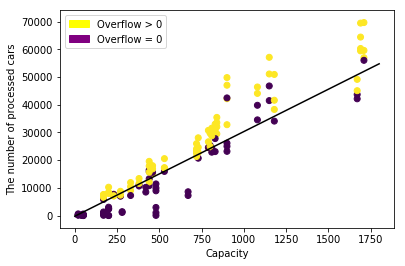

In [4]:
yellow_patch = mpatches.Patch(color='Yellow', label='Overflow > 0')
purple_patch = mpatches.Patch(color='Purple', label='Overflow = 0')
plt.legend(handles=[yellow_patch,purple_patch])

w = clf.coef_[0]
# print(w)

a = -w[0] / w[1]

xx = np.linspace(0,1800)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-')

plt.scatter(X[:, 0] , X[:, 1], c = y)
plt.xlabel("Capacity")
plt.ylabel("The number of processed cars")

plt.show()


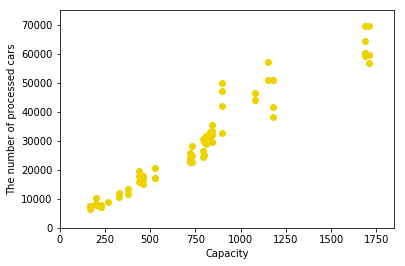

In [5]:
data4 = []

for i in overflow_positive:
    if (w[1]*i[1]) >= (-w[0]*i[0])-clf.intercept_[0] :
        data4.append(i)
        
data5 = np.array(data4)

plt.scatter(data5[:, 0], data5[:, 1],c ='#EDD200') 

plt.xlabel("Capacity")
plt.ylabel("The number of processed cars")
plt.axis([0, 1850, 0, 75000])
plt.show() 